In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 500)
plt.rcParams["figure.figsize"] = [24, 12]
warnings.filterwarnings('ignore')

# 1.0) Coleta de Dados

In [88]:
df = pd.read_csv('data/police.csv')
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# 2.0) Limpeza e Descrição dos Dados

In [89]:
df2 = df.copy()

### 2.1) Renomear Colunas

In [90]:
for col in df2.columns.values:
    print(col, end=' | ')

state | stop_date | stop_time | county_name | driver_gender | driver_race | violation_raw | violation | search_conducted | search_type | stop_outcome | is_arrested | stop_duration | drugs_related_stop | district | 

Todos os nomes das Colunas parecem estar bem formatados (lowercase e separados por caractere único), porém algumas podem ter seus nomes melhorados.

In [91]:
df2.rename({'county_name': 'country_name'}, axis=1, inplace=True)

### 2.2) Dimensões dos Dados

In [92]:
print(f'Número de linhas: {df2.shape[0]}')
print(f'Número de colunas: {df2.shape[1]}')

Número de linhas: 91741
Número de colunas: 15


### 2.3) Tipos dos Dados

In [93]:
df2.dtypes

state                  object
stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
dtype: object

Nota-se que, atualmente, existem apenas 3 tipos de dados, são eles: object (string), bool e float64. Sendo que várias destas Features estão erroneamente tipadas, fazendo-se necessária a posterior alteração de seus tipos.

### 2.4) Checar NAs

In [94]:
df2.isna().sum()

state                     0
stop_date                 0
stop_time                 0
country_name          91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Existem várias colunas com valores nulos, inclusive uma que possui todos os seus valores iguais a nulo, por se tratar de uma coluna sem valor algum, irei dropar ela. E fazer uma análise mais aprofundada, coluna por coluna, para descobrir qual método utilizar para tratar os restantes dos dados nulos.

### 2.5) Corrigir Tipos dos Dados

In [95]:
df2['is_arrested'] = df2['is_arrested'].astype('bool')

In [96]:
df2['stop_datetime'] = pd.to_datetime(df2['stop_date'].str.cat(df2['stop_time'], sep=' '))
df2.drop(['stop_date', 'stop_time'], axis='columns', inplace=True)

Setando a variável `stop_datetime` como o novo index, assim transformando os dados em uma série temporal propriamente dita.

In [97]:
df2.set_index('stop_datetime', inplace=True)

In [98]:
df2.head(2)

,state,country_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


### 2.6) Filtragem de Dados

##### Filtragem de Variáveis

In [99]:
df2.drop(['country_name', 'state'], axis='columns', inplace=True)

##### Filtragem de Linhas

In [100]:
df2.dropna(subset=['driver_gender'], axis=0, inplace=True)

### 2.7) Estatísticas Descritivas

In [101]:
df2.describe()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
count,86536,86536,86536,86536,86536,3307,86536,86536,86536,86536,86536
unique,2,5,12,6,2,25,6,2,3,2,6
top,M,White,Speeding,Speeding,False,Incident to Arrest,Citation,False,0-15 Min,False,Zone X4
freq,62762,61870,48423,48423,83229,1290,77091,83458,69577,85674,22503


# 3.0) Análise Exploratória de Dados

In [102]:
df3 = df2.copy()

### 3.1) Análise Univariada

##### Variáveis Categóricas

| driver_gender | driver_race | violation | violation_raw | search_type | stop_outcome | stop_duration | district

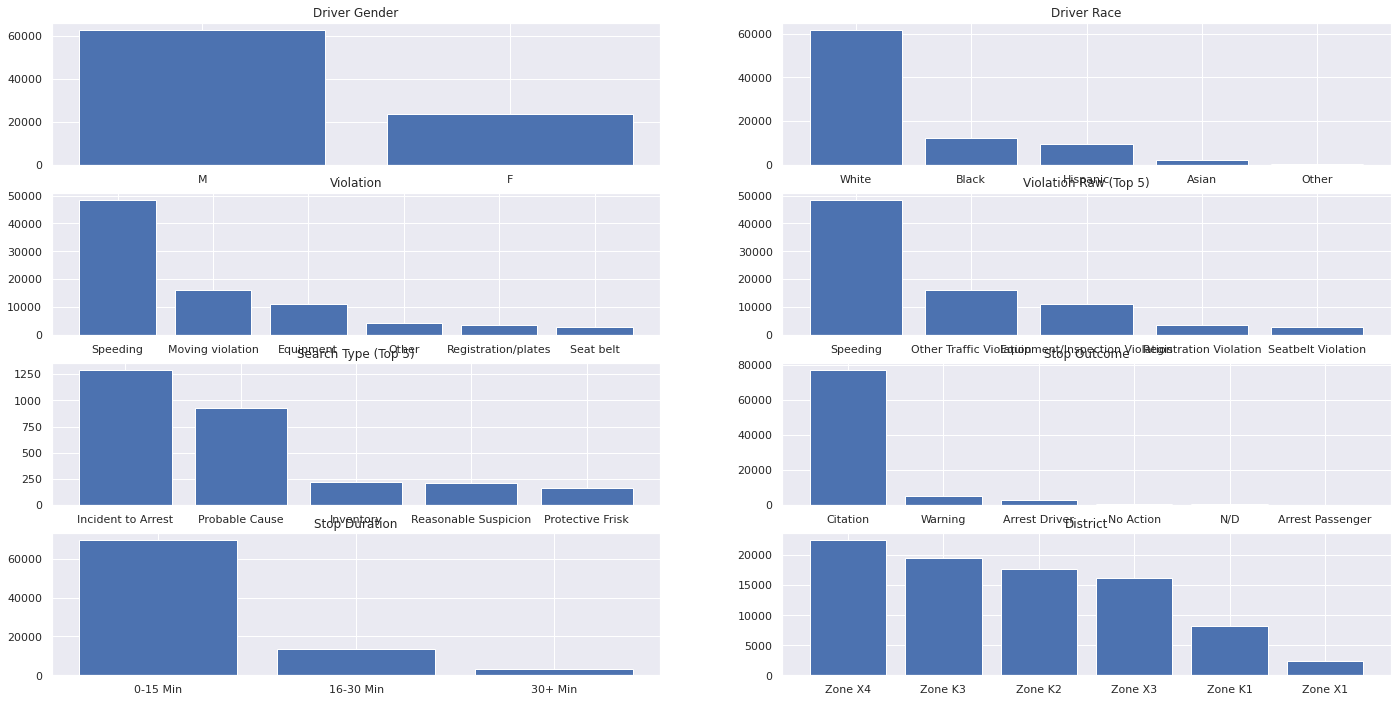

In [103]:
# driver_gender
fig, ax = plt.subplots(nrows=4, ncols=2)

ax[0, 0].bar(x='index', height='driver_gender', data=df3['driver_gender'].value_counts().reset_index())
ax[0, 0].set_title('Driver Gender')

ax[0, 1].bar(x='index', height='driver_race', data=df3['driver_race'].value_counts().reset_index())
ax[0, 1].set_title('Driver Race')

ax[1, 0].bar(x='index', height='violation', data=df3['violation'].value_counts().reset_index())
ax[1, 0].set_title('Violation')

ax[1, 1].bar(x='index', height='violation_raw', data=df3['violation_raw'].value_counts()[:5].reset_index())
ax[1, 1].set_title('Violation Raw (Top 5)')

ax[2, 0].bar(x='index', height='search_type', data=df3['search_type'].value_counts()[:5].reset_index())
ax[2, 0].set_title('Search Type (Top 5)')

ax[2, 1].bar(x='index', height='stop_outcome', data=df3['stop_outcome'].value_counts().reset_index())
ax[2, 1].set_title('Stop Outcome')

ax[3, 0].bar(x='index', height='stop_duration', data=df3['stop_duration'].value_counts().reset_index())
ax[3, 0].set_title('Stop Duration')

ax[3, 1].bar(x='index', height='district', data=df3['district'].value_counts().reset_index())
ax[3, 1].set_title('District')

plt.show()

### 3.2) Análise Bivariada

##### H1) Os gêneros cometem violações diferentes?

In [142]:
df_h1 = df3.groupby('driver_gender').violation.value_counts(normalize=True)
df_h1.name = 'value'
df_h1 = df_h1.reset_index()

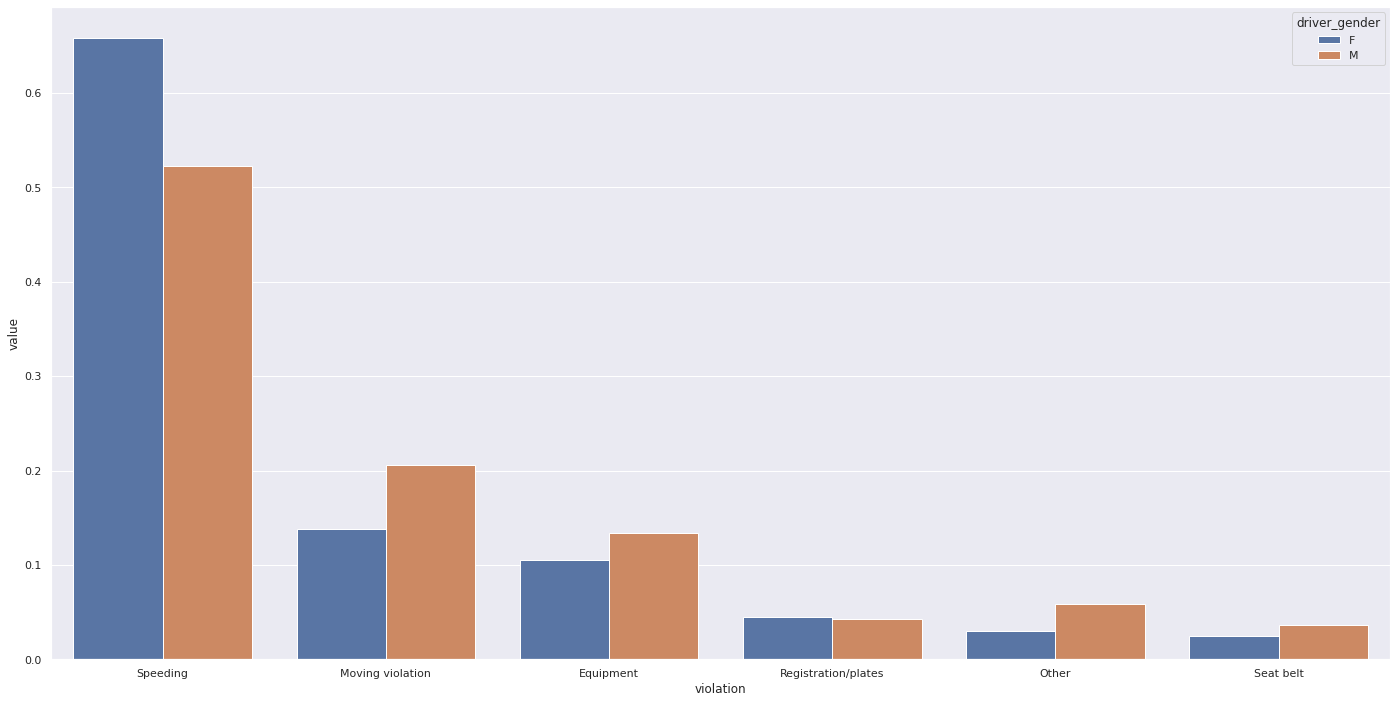

In [145]:
fig, ax = plt.subplots()

sns.barplot(x='violation', y='value', hue='driver_gender', data=df_h1)

plt.show()

##### H2) O gênero afeta quem recebe uma multa por excesso de velocidade?

In [106]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = df3[(df3['driver_gender'] == 'F') & (df3['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = df3[(df3['driver_gender'] == 'M') & (df3['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation           0.95
Warning            0.04
Arrest Driver      0.01
N/D                0.00
Arrest Passenger   0.00
No Action          0.00
Name: stop_outcome, dtype: float64
Citation           0.94
Warning            0.04
Arrest Driver      0.02
Arrest Passenger   0.00
No Action          0.00
N/D                0.00
Name: stop_outcome, dtype: float64


##### H3) O gênero afeta de quem o veículo é revistado?

In [107]:
# Calculate the search rate for each combination of gender and violation
print(df3.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F               0.04
                     M               0.07
Moving violation     F               0.04
                     M               0.06
Other                F               0.04
                     M               0.05
Registration/plates  F               0.05
                     M               0.11
Seat belt            F               0.02
                     M               0.04
Speeding             F               0.01
                     M               0.03
Name: search_conducted, dtype: float64


##### H4) O gênero afeta quem é revistado durante uma busca no veículo?

In [108]:
# Count the 'search_type' values
print(df3.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
df3['frisk'] = df3.search_type.str.contains('Protective Frisk', na=False)

# Create a DataFrame of stops in which a search was conducted
searched = df3[df3.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris